In [4]:
pip install tensorflow

     ---------------------------------------- 455.9/455.9 MB 241.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 462.4 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 701.4 kB/s eta 0:00:00
     ---------------------------------------- 123.4/123.4 kB 516.5 kB/s eta 0:00:00
     ---------------------------------------- 438.7/438.7 kB 638.5 kB/s eta 0:00:00
     ---------------------------------------- 895.9/895.9 kB 623.2 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 628.9 kB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 196.6 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 161.6 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 302.8 kB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 159.3 kB/s eta 0:00:00
     -----------

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# iris 데이터를 읽기
df = pd.read_csv("iris.csv")    

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [3]:
print(df.groupby('iris_type').count())

                 sepal_length  sepal_width  petal_length  petal_width
iris_type                                                            
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


In [4]:
X = df.iloc[:,0:4]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"Iris-setosa":[1,0,0], "Iris-versicolor":[0,1,0], "Iris-virginica":[0,0,1]}
y = np.empty((150,3))     # 150x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["iris_type"]):
    y[i] = bclass[v]        # "Iris-setosa"이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]

In [5]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(10, input_shape=(4,)))  # 입력 4개로부터 전달받는 10개 노드의 layer 생성
model.add(layers.Activation('relu'))  # 활성화함수 채택(hidden layer)
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(8))            # 8개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy'])  # 정확도 측정

In [6]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=20,     # 20개에 한 번씩 업데이터 실행
    epochs=300,          # 전체 훈련 데이터셋을 총 200회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.1,  
        #validation data 분할 비율. 즉, 150개 중에서 20%인 30개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)],  
        #'val_loss'를 monitor하여 감소하면 10번 더 참고 조기중지(early stopping)
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/300
5/5 [==============================] - 1s 68ms/step - loss: 2.2105 - accuracy: 0.3667 - val_loss: 2.1388 - val_accuracy: 0.1000
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 1.9746 - accuracy: 0.3667 - val_loss: 2.0090 - val_accuracy: 0.1000
Epoch 3/300
5/5 [==============================] - 0s 13ms/step - loss: 1.7701 - accuracy: 0.3667 - val_loss: 1.9076 - val_accuracy: 0.1000
Epoch 4/300
5/5 [==============================] - 0s 12ms/step - loss: 1.5954 - accuracy: 0.3667 - val_loss: 1.8255 - val_accuracy: 0.1000
Epoch 5/300
5/5 [==============================] - 0s 11ms/step - loss: 1.6761 - accuracy: 0.3556 - val_loss: 1.7346 - val_accuracy: 0.1000
Epoch 6/300
5/5 [==============================] - 0s 11ms/step - loss: 1.6790 - accuracy: 0.3889 - val_loss: 1.6486 - val_accuracy: 0.1000
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 1.5341 - accuracy: 0.3556 - val_loss: 1.5801 - val_accuracy: 0.1000
Epoch 8/300
5/5 [===

5/5 [==============================] - 0s 14ms/step - loss: 0.5705 - accuracy: 0.8222 - val_loss: 0.4095 - val_accuracy: 1.0000
Epoch 60/300
5/5 [==============================] - 0s 15ms/step - loss: 0.6420 - accuracy: 0.7333 - val_loss: 0.4085 - val_accuracy: 1.0000
Epoch 61/300
5/5 [==============================] - 0s 16ms/step - loss: 0.6093 - accuracy: 0.7778 - val_loss: 0.4025 - val_accuracy: 1.0000
Epoch 62/300
5/5 [==============================] - 0s 16ms/step - loss: 0.5918 - accuracy: 0.7667 - val_loss: 0.3946 - val_accuracy: 1.0000
Epoch 63/300
5/5 [==============================] - 0s 15ms/step - loss: 0.5686 - accuracy: 0.7444 - val_loss: 0.3765 - val_accuracy: 1.0000
Epoch 64/300
5/5 [==============================] - 0s 13ms/step - loss: 0.6148 - accuracy: 0.7667 - val_loss: 0.3732 - val_accuracy: 1.0000
Epoch 65/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5817 - accuracy: 0.7889 - val_loss: 0.3685 - val_accuracy: 1.0000
Epoch 66/300
5/5 [========

5/5 [==============================] - 0s 14ms/step - loss: 0.3475 - accuracy: 0.8556 - val_loss: 0.1426 - val_accuracy: 1.0000
Epoch 118/300
5/5 [==============================] - 0s 15ms/step - loss: 0.4288 - accuracy: 0.8333 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 119/300
5/5 [==============================] - 0s 14ms/step - loss: 0.3861 - accuracy: 0.8333 - val_loss: 0.1409 - val_accuracy: 1.0000
Epoch 120/300
5/5 [==============================] - 0s 16ms/step - loss: 0.3828 - accuracy: 0.8556 - val_loss: 0.1388 - val_accuracy: 1.0000
Epoch 121/300
5/5 [==============================] - 0s 15ms/step - loss: 0.3869 - accuracy: 0.8556 - val_loss: 0.1326 - val_accuracy: 1.0000
Epoch 122/300
5/5 [==============================] - 0s 14ms/step - loss: 0.3468 - accuracy: 0.9222 - val_loss: 0.1294 - val_accuracy: 1.0000
Epoch 123/300
5/5 [==============================] - 0s 16ms/step - loss: 0.4495 - accuracy: 0.7889 - val_loss: 0.1290 - val_accuracy: 1.0000
Epoch 124/300
5/5 [=

Epoch 175/300
5/5 [==============================] - 0s 15ms/step - loss: 0.3608 - accuracy: 0.8333 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 176/300
5/5 [==============================] - 0s 14ms/step - loss: 0.3005 - accuracy: 0.9111 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 177/300
5/5 [==============================] - 0s 13ms/step - loss: 0.2980 - accuracy: 0.9111 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 178/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2929 - accuracy: 0.9111 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 179/300
5/5 [==============================] - 0s 15ms/step - loss: 0.2978 - accuracy: 0.8889 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 180/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2549 - accuracy: 0.9000 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 181/300
5/5 [==============================] - 0s 14ms/step - loss: 0.3031 - accuracy: 0.8889 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 

Epoch 233/300
5/5 [==============================] - 0s 15ms/step - loss: 0.2184 - accuracy: 0.9222 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 234/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1896 - accuracy: 0.9667 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 235/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3257 - accuracy: 0.8667 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 236/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2221 - accuracy: 0.9000 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 237/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2196 - accuracy: 0.9000 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 238/300
5/5 [==============================] - 0s 15ms/step - loss: 0.2606 - accuracy: 0.9222 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 239/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2275 - accuracy: 0.9000 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 

Epoch 291/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1812 - accuracy: 0.9556 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 292/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1527 - accuracy: 0.9778 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 293/300
5/5 [==============================] - 0s 14ms/step - loss: 0.1833 - accuracy: 0.9111 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 294/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1979 - accuracy: 0.9222 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 295/300
5/5 [==============================] - 0s 14ms/step - loss: 0.2108 - accuracy: 0.9333 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 296/300
5/5 [==============================] - 0s 14ms/step - loss: 0.1508 - accuracy: 0.9556 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 297/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1403 - accuracy: 0.9556 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 

In [7]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

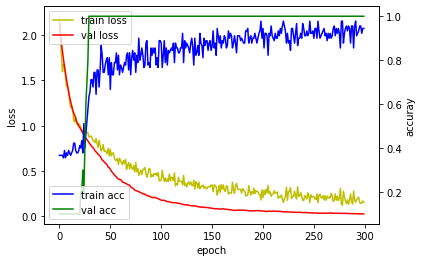

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 2

In [9]:
model.get_weights()

[array([[-0.2906744 ,  0.20027333, -0.09110651, -0.60207444,  0.15214339,
         -0.4301924 , -0.60816073, -0.26213235,  0.6895543 , -0.45601502],
        [ 0.54453254, -0.5600072 ,  0.50968766,  0.04366291,  0.14322282,
          0.06732392, -0.00551718, -0.4466532 , -0.20914352, -0.02457726],
        [-0.47508016,  0.45307076,  0.08309688, -0.5701083 ,  0.575024  ,
         -0.3201179 ,  0.20277983,  0.49688366, -0.74307024, -0.50831294],
        [ 0.39955804,  0.15031072, -0.67558867,  0.64978147,  0.7959674 ,
         -0.20745304,  0.42022705,  0.64993733, -0.19547282,  0.50637305]],
       dtype=float32),
 array([-0.07678263, -0.04965587,  0.04799657,  0.        , -0.13355534,
         0.        ,  0.        , -0.27990985,  0.30662775,  0.        ],
       dtype=float32),
 array([[ 0.4796396 , -0.09097292, -0.27306366, -0.07225899,  0.08957896,
          0.5521901 , -0.42894208, -0.21050495],
        [ 1.0201339 , -0.21277097, -0.0750156 ,  1.2054231 , -0.33289698,
          0.0

In [10]:
model.save("dnn_iris.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model("dnn_iris.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [11]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

2/2 [==============================] - 0s 2ms/step
[[9.95122612e-01 4.87736380e-03 6.08401732e-11]
 [5.76062886e-09 3.84393148e-02 9.61560667e-01]
 [8.11175696e-08 6.44459501e-02 9.35553968e-01]
 [1.37895131e-02 9.78680730e-01 7.52975885e-03]
 [2.02644324e-09 3.27544697e-02 9.67245519e-01]
 [9.93057609e-01 6.94243424e-03 2.91734137e-10]
 [9.93078530e-01 6.92143617e-03 2.37541709e-10]
 [9.97407138e-01 2.59289029e-03 2.25007990e-12]
 [1.69461742e-07 6.58501461e-02 9.34149683e-01]
 [4.57799061e-08 5.32395914e-02 9.46760356e-01]
 [1.39628668e-04 8.58961701e-01 1.40898570e-01]
 [9.94495451e-01 5.50452387e-03 1.05825002e-10]
 [1.30460330e-03 9.71199334e-01 2.74961349e-02]
 [9.96137798e-01 3.86223919e-03 1.97577024e-11]
 [1.71533306e-04 9.80579078e-01 1.92494802e-02]
 [9.58736450e-08 1.16100028e-01 8.83899927e-01]
 [7.93535051e-08 5.70787601e-02 9.42921221e-01]
 [2.41545099e-03 9.92797315e-01 4.78730211e-03]
 [1.77907315e-03 9.86614406e-01 1.16065480e-02]
 [9.93647993e-01 6.35202462e-03 1.952

array([0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 1, 2, 2, 0], dtype=int64)

In [12]:
# 새로운 샘플의 클래스 예측하기
X_new = [5.7, 3.8, 1.7, 0.3]
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[5.7, 3.8, 1.7, 0.3]
1/1 [==============================] - 0s 91ms/step
[[9.9512261e-01 4.8773685e-03 6.0840291e-11]] 0


In [13]:
type(X_test)

pandas.core.frame.DataFrame

In [14]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
100,5.7,3.8,1.7,0.3
101,7.2,3.6,6.1,2.5
102,6.3,2.9,5.6,1.8
103,4.9,2.4,3.3,1.0
104,7.7,3.0,6.1,2.3


In [15]:
X_test.head(5).index.tolist()

[100, 101, 102, 103, 104]

In [16]:
X_test0 = X_test.loc[100]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[5.7, 3.8, 1.7, 0.3]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

sepal_length    5.7
sepal_width     3.8
petal_length    1.7
petal_width     0.3
Name: 100, dtype: float64

1/1 [==============================] - 0s 51ms/step
[[9.9512261e-01 4.8773685e-03 6.0840291e-11]] 0


In [17]:
def predict_iris(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [18]:
X_mean = [X_train["sepal_length"].mean(), X_train["sepal_width"].mean(), X_train["petal_length"].mean(), X_train["petal_width"].mean()]
X_min = [X_train["sepal_length"].min(), X_train["sepal_width"].min(), X_train["petal_length"].min(), X_train["petal_width"].min()]
X_max = [X_train["sepal_length"].max(), X_train["sepal_width"].max(), X_train["petal_length"].max(), X_train["petal_width"].max()]
X_min_max = [X_train["sepal_length"].min(), X_train["sepal_width"].max(), X_train["petal_length"].min(), X_train["petal_width"].max()]
X_max_min = [X_train["sepal_length"].max(), X_train["sepal_width"].min(), X_train["petal_length"].max(), X_train["petal_width"].min()]

predict_iris(X_mean)
predict_iris(X_min)
predict_iris(X_max)
predict_iris(X_min_max)
predict_iris(X_max_min)

1/1 [==============================] - 0s 52ms/step
[5.770000000000001, 3.019, 3.6839999999999997, 1.1649999999999998]	[[0.01519255 0.9830635  0.00174388]]	1
1/1 [==============================] - 0s 45ms/step
[4.3, 2.0, 1.1, 0.1]	[[9.827776e-01 1.722242e-02 4.860667e-09]]	0
1/1 [==============================] - 0s 47ms/step
[7.7, 4.1, 6.7, 2.5]	[[5.3420384e-09 4.6360660e-02 9.5363933e-01]]	2
1/1 [==============================] - 0s 44ms/step
[4.3, 4.1, 1.1, 2.5]	[[2.4956852e-01 7.5036609e-01 6.5378277e-05]]	1
1/1 [==============================] - 0s 47ms/step
[7.7, 2.0, 6.7, 0.1]	[[3.5805274e-06 8.5644025e-01 1.4355613e-01]]	1
